# Part 2: Data analysis

Now that the data is already loaded in the SQL Server table, let's explore it.

In [1]:
# importing libraries
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
'''Let's query all the data from StockPrices.'''

# connecting to the SQL Server database
conn = pyodbc.connect(
    'Driver={SQL Server};'
    'Server=INSERT_YOUR_SERVER_HERE;'
    'Database=StockData;'
    'Trusted_Connection=yes'
)

query = 'SELECT * FROM StockPrices'

df_stock_prices = pd.read_sql_query(query, conn)

conn.close()

df_stock_prices.head()

,Date,Open,High,Low,Close,Volume,Ticker
0,2025-01-15,234.635,238.9600,234.430,237.87,39590680,AAPL
1,2025-01-14,234.750,236.1200,232.472,233.28,39435294,AAPL
2,2025-01-13,233.530,234.6700,229.720,234.40,49630725,AAPL
3,2025-01-10,240.010,240.1600,233.000,236.85,61710856,AAPL
4,2025-01-08,241.920,243.7123,240.050,242.70,37628940,AAPL


In [3]:
df_stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    400 non-null    object 
 1   Open    400 non-null    float64
 2   High    400 non-null    float64
 3   Low     400 non-null    float64
 4   Close   400 non-null    float64
 5   Volume  400 non-null    int64  
 6   Ticker  400 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 22.0+ KB


In [9]:
'''
The Date column comes as an object. Let's convert it to datetime.
Also, in order to make it easier to visualize the data, let's transform the numeric columns into rows.
'''

df_stock_prices['Date'] = pd.to_datetime(df_stock_prices['Date'])

df_melted = pd.melt(
    frame=df_stock_prices,
    id_vars=['Date', 'Ticker'],
    value_name='Value',
    value_vars=['Open', 'High', 'Low', 'Close', 'Volume'],
    var_name='Type'
)

display(df_melted)
display(df_melted.info())

,Date,Ticker,Type,Value
0,2025-01-15,AAPL,Open,2.346350e+02
1,2025-01-14,AAPL,Open,2.347500e+02
2,2025-01-13,AAPL,Open,2.335300e+02
3,2025-01-10,AAPL,Open,2.400100e+02
4,2025-01-08,AAPL,Open,2.419200e+02
...,...,...,...,...
1995,2024-08-28,AMZN,Volume,2.904502e+07
1996,2024-08-27,AMZN,Volume,2.984198e+07
1997,2024-08-26,AMZN,Volume,2.236624e+07
1998,2024-08-23,AMZN,Volume,2.915009e+07


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2000 non-null   datetime64[ns]
 1   Ticker  2000 non-null   object        
 2   Type    2000 non-null   object        
 3   Value   2000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 62.6+ KB


None

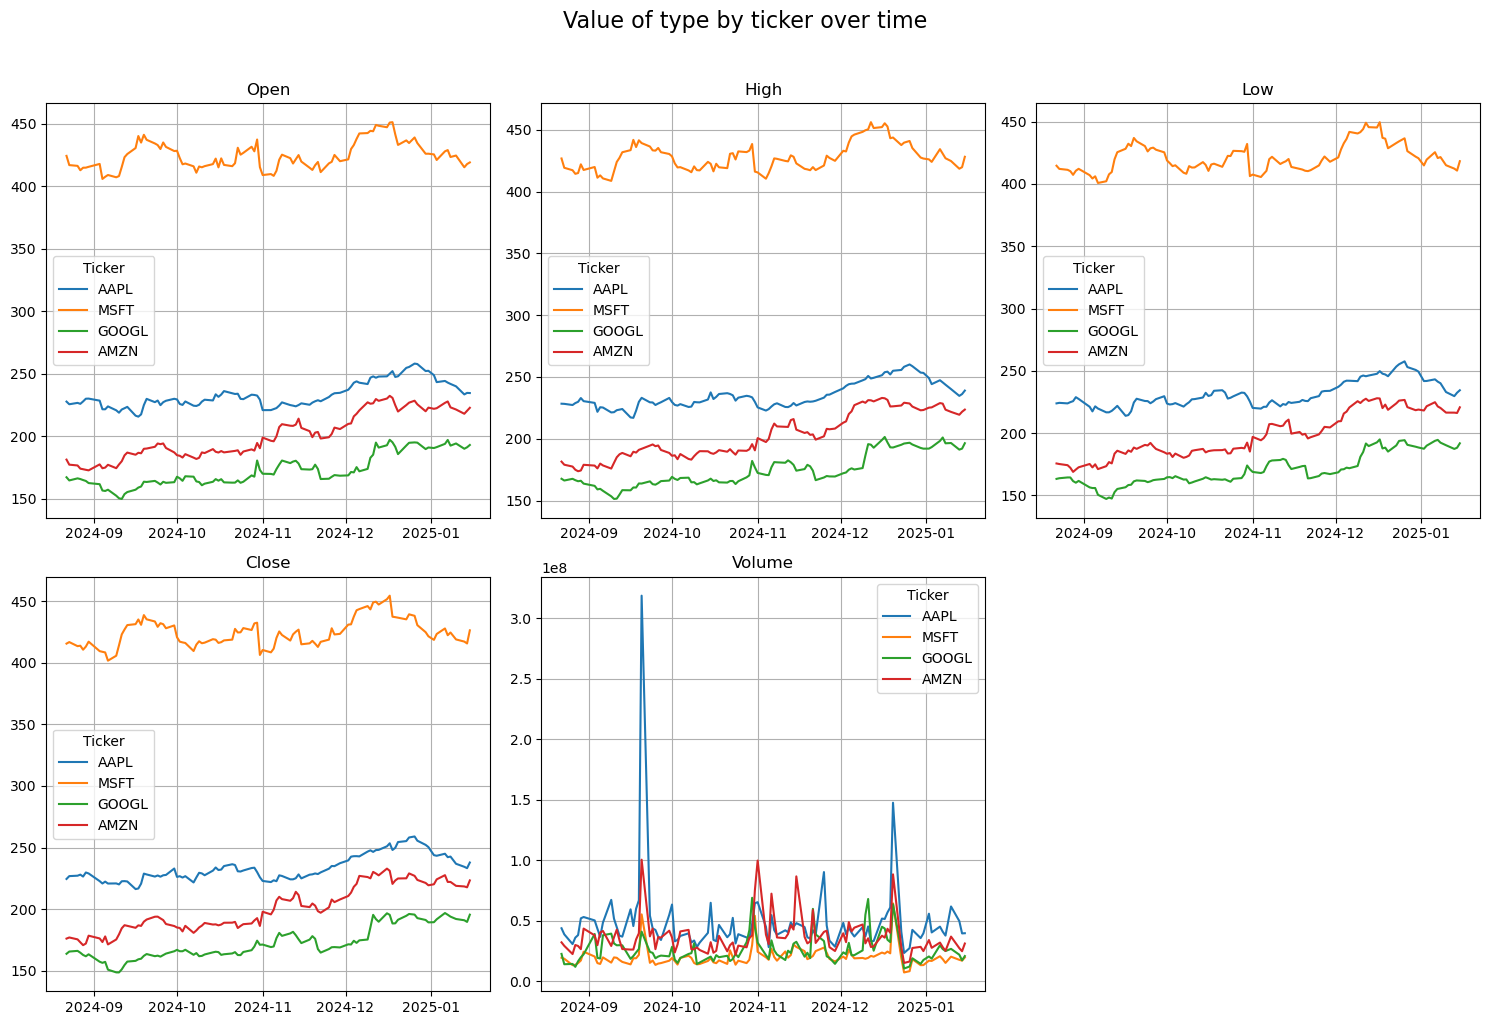

In [ ]:
# visualizing the evolution of position types by ticker
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))
axs = axs.flatten()
axs[5].remove()

types = df_melted['Type'].unique()

for i, type_ in enumerate(types):
    df_type_filtered = df_melted[df_melted['Type'] == type_]

    sns.lineplot(data=df_type_filtered, x='Date', y='Value', hue='Ticker', ax=axs[i])
    axs[i].set_title(type_)
    axs[i].set_xlabel(None)
    axs[i].set_ylabel(None)
    axs[i].grid()

fig.suptitle('Value of type by ticker over time', fontsize=16, y=1.02)

plt.tight_layout()
plt.show()

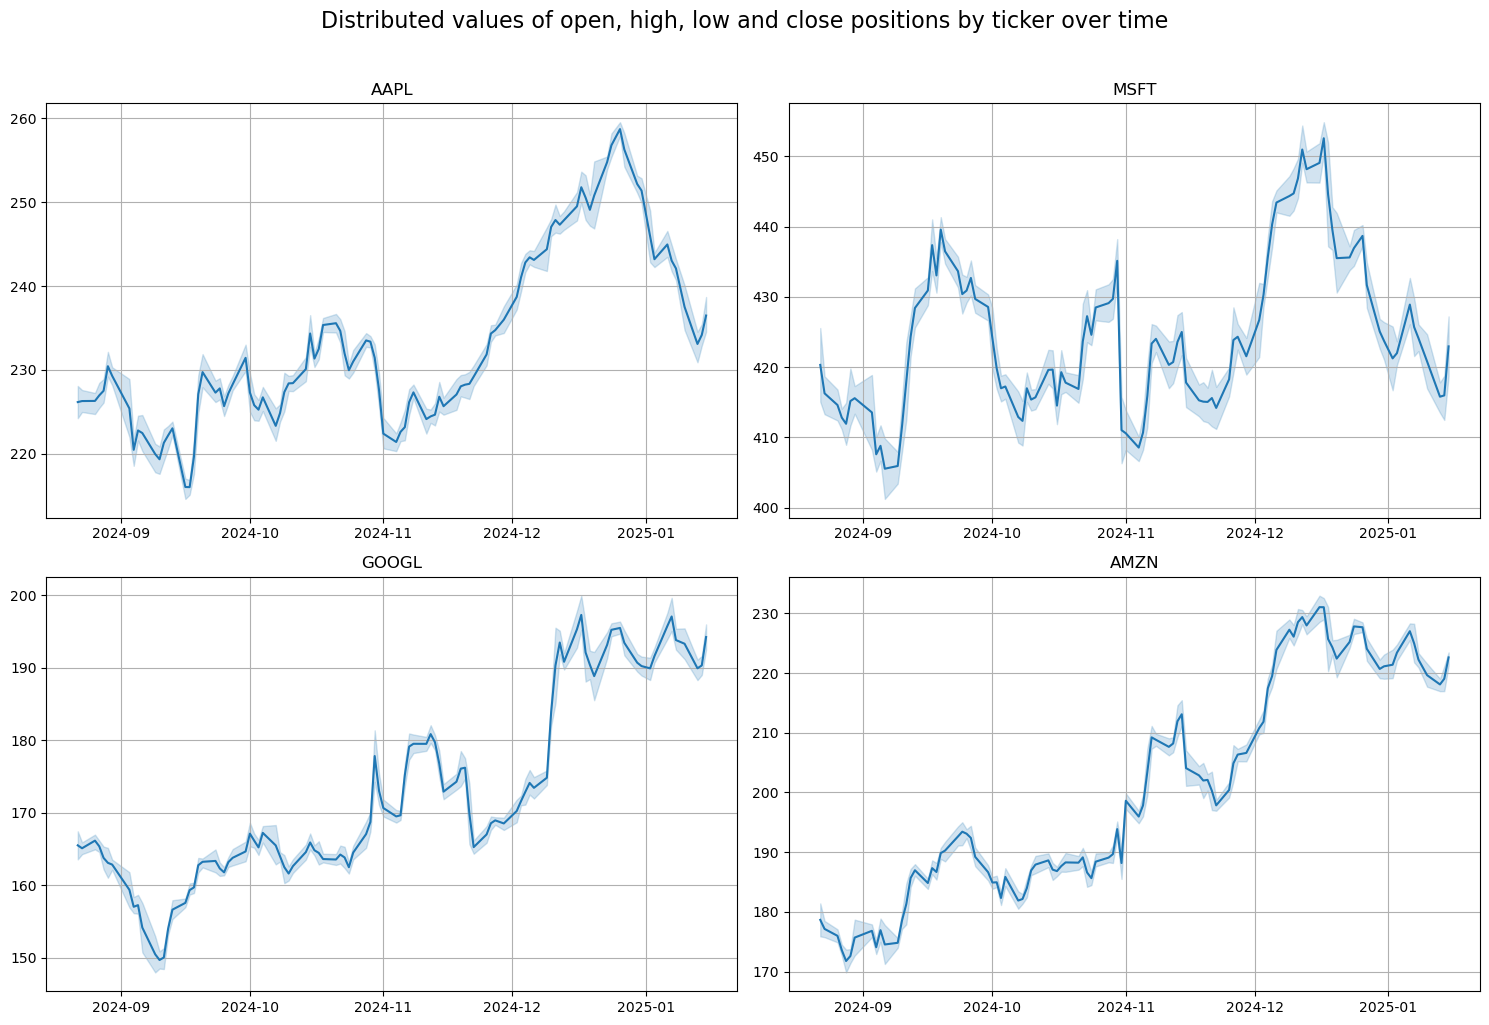

In [25]:
# more visualization, in a perspective of distribution
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))
axs = axs.flatten()

df_types = df_melted[df_melted['Type'] != 'Volume']
tickers = df_melted['Ticker'].unique()

for i, ticker in enumerate(tickers):
    df_ticker_filtered = df_types[df_types['Ticker'] == ticker]

    sns.lineplot(data=df_ticker_filtered, x='Date', y='Value', ax=axs[i])

    axs[i].set_title(ticker)
    axs[i].set_xlabel(None)
    axs[i].set_ylabel(None)
    axs[i].grid()

fig.suptitle('Distributed values of open, high, low and close positions by ticker over time', fontsize=16, y=1.02)

plt.tight_layout()
plt.show()